# Pima Indians Diabetes Database

## Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
## Content

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

# Columns

###  Pregnancies
Number of times pregnant
### Glucose
Plasma glucose concentration a 2 hours in an oral glucose tolerance test
### BloodPressure
Diastolic blood pressure (mm Hg)
### SkinThickness
Triceps skin fold thickness (mm)
### Insulin
2-Hour serum insulin (mu U/ml)
### BMI
Body mass index (weight in kg/(height in m)^2)
### DiabetesPedigreeFunction
Diabetes pedigree function
### Age
Age (years)
### Outcome
Class variable (0 or 1) 268 of 768 are 1, the others are 0

# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Creating DataFrame

In [2]:
df=pd.read_csv('diabetes.csv')

#  Printing first 20 Rows

In [3]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
# shape of df
df.shape

(768, 9)

In [5]:
# checking the different data-types present in df
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
# checking null values present in df
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
corr=df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


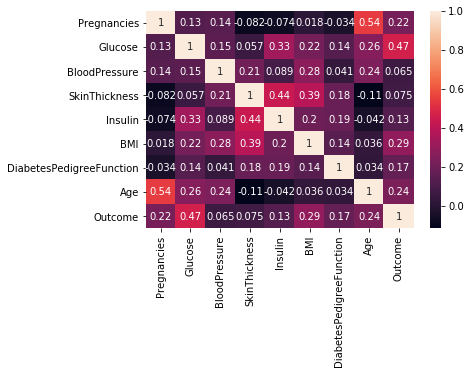

In [9]:
sns.heatmap(corr,annot=True)

# Data Visualization

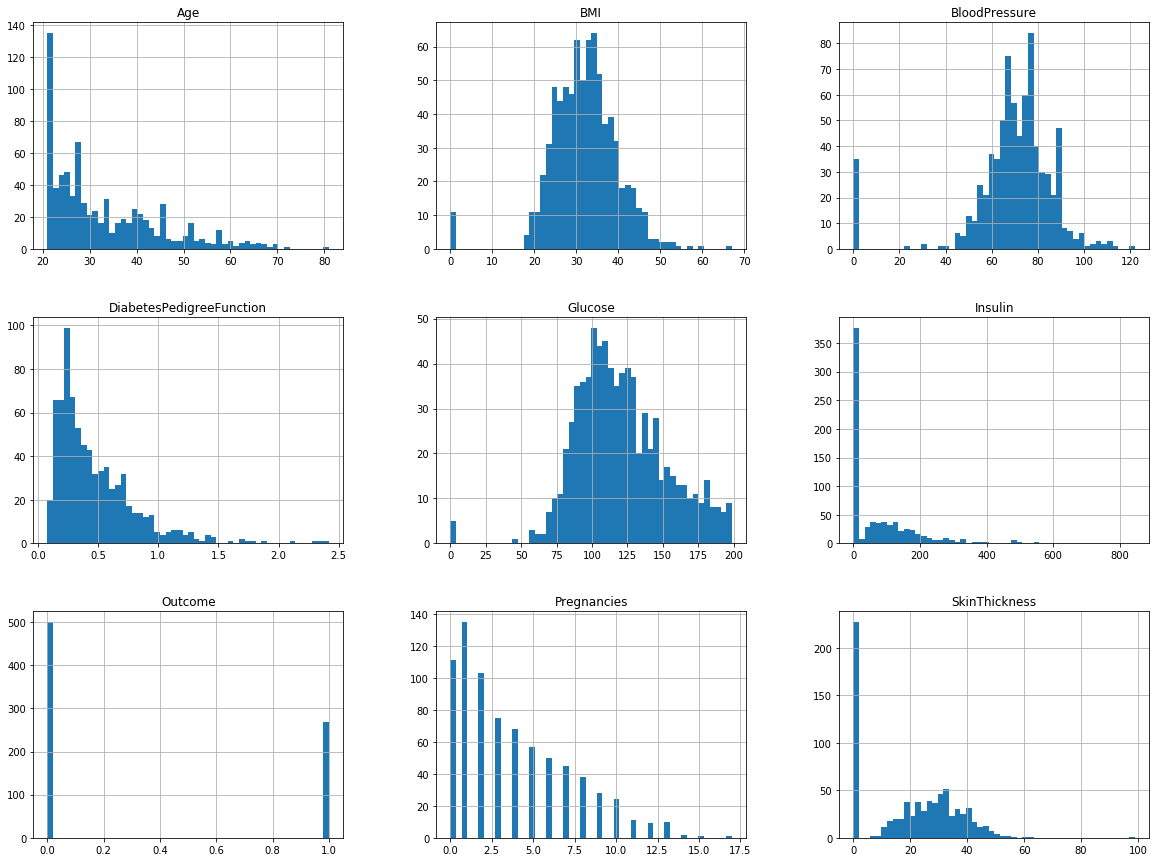

In [10]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [11]:
# dealing with missing values
cols=df.columns.drop('Outcome')
for col in cols:
    df[col]=df[col].replace(0,np.nan)
    df[col]=df[col].fillna(df[col].mean())
df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin']]=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin']].astype(int)
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,155,33.600000,0.627,50,1
1,1,85,66,29,155,26.600000,0.351,31,0
2,8,183,64,29,155,23.300000,0.672,32,1
3,1,89,66,23,94,28.100000,0.167,21,0
4,4,137,40,35,168,43.100000,2.288,33,1
5,5,116,74,29,155,25.600000,0.201,30,0
6,3,78,50,32,88,31.000000,0.248,26,1
7,10,115,72,29,155,35.300000,0.134,29,0
8,2,197,70,45,543,30.500000,0.158,53,1
9,8,125,96,29,155,32.457464,0.232,54,1


In [12]:
# Defining x and y
x=df.drop(columns='Outcome')
y=df[['Outcome']]

In [13]:
#checking first 5 rows of x
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,155,33.6,0.627,50
1,1,85,66,29,155,26.6,0.351,31
2,8,183,64,29,155,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,4,137,40,35,168,43.1,2.288,33


In [14]:
#checking first 5 rows of y
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


# Data Standardization

In [15]:
from sklearn.preprocessing import StandardScaler
scX = StandardScaler()

#Standardization of x
x = scX.fit_transform(x)

# Data Decomposition

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)

#data decomposition for x
x= pca.fit_transform(x)

# Pipeline

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35,random_state=1)

#printing the shapes
print('Shape of X_train:',X_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (499, 8)
Shape of X_test: (269, 8)
Shape of y_train: (499, 1)
Shape of y_test: (269, 1)


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr=Pipeline([('lr_classifier',LogisticRegression())])
svm=Pipeline([('svm_classifier',SVC())])
nb=Pipeline([('nf_classifier',GaussianNB())])
rf=Pipeline([('rf_classifier',RandomForestClassifier())])

#making the list of pipeline
pipelines=[lr,svm,nb,rf]

best_accuracy=0.0
best_pipeline=""

#Dictionary of pipeline and classifier types for ease of reference
pipe_dict={0:'Logistic Regression',1:'SVM',2:'Naive Bayes',3:'Random Forest'}

#Fit the pipeline
for pipe in pipelines:
    pipe.fit(X_train,y_train)

C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
 

In [19]:
#checking which model perform best
for i, model in enumerate(pipelines):
    model.fit(X_train,y_train)
    print('{} Test Accuracy:{}'.format(pipe_dict[i],model.score(X_train,y_train)))

Logistic Regression Test Accuracy:0.7735470941883767
SVM Test Accuracy:0.8196392785571143
Naive Bayes Test Accuracy:0.7434869739478958
Random Forest Test Accuracy:0.9899799599198397


C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
 

# Using Random Forest Classifier

In [20]:
#using Random Forest for classification as it has highest score in accuracy
clf=RandomForestClassifier()

#trainnig the model
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
pred[:5]

C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Asad\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


array([0, 0, 0, 0, 0], dtype=int64)

# Plotting Graph Actual V/S Predicted

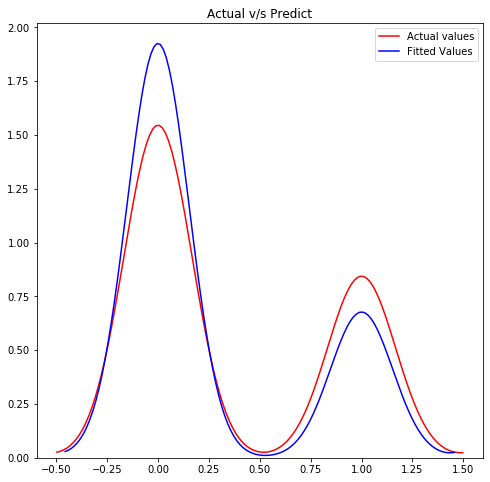

In [21]:
#checking model wheather it is overfitted or underfitted
plt.figure(figsize=(8,8))
plt.title('Actual v/s Predict')
ax1=sns.distplot(y_test,hist=False,color='r',label='Actual values')
sns.distplot(pred,hist=False,color='b',label='Fitted Values',ax=ax1)

In [22]:
# the clf at 0 overfitted and at 1 it is underfitted

In [23]:
#checking accuracy of the model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#cross validation score
score=cross_val_score(clf,X_train,y_train,cv=4)
print('Score=',score)
print('Score mean=',score.mean())

#cross validation prediction
predict=cross_val_predict(clf,X_train,y_train,cv=4)
print('Predicts=',predict[0:5])

#r square score
r=r2_score(y_test,pred)
print('R-square=',r)

#mean squared error
mse=mean_squared_error(y_test,pred)
print('Mean Squared Error=',mse)

#accuracy score
print('Accuracy Score=',accuracy_score(y_test,pred))

#classification report
print('\nClassification Report:\n',classification_report(y_test,pred))

C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was pa

Score= [0.63492063 0.728      0.64516129 0.68548387]
Score mean= 0.6733914490527394
Predicts= [1 1 0 0 0]
R-square= -0.09032062915910455
Mean Squared Error= 0.24907063197026022
Accuracy Score= 0.7509293680297398

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       174
           1       0.70      0.52      0.59        95

    accuracy                           0.75       269
   macro avg       0.73      0.70      0.71       269
weighted avg       0.74      0.75      0.74       269



# Using RandomsearchCV for Hyperparameter tuning

In [24]:
from sklearn.model_selection import RandomizedSearchCV 

# Creating the hyperparameter grid  
param_dist = {'n_estimators':[10, 100, 1000],
              'max_features': ['sqrt', 'log2']}  

# Instantiating RandomizedSearchCV object 
random_search = RandomizedSearchCV(clf, param_dist, cv = 4,scoring='accuracy',error_score=0) 
  
random_search.fit(X_train,y_train) 
  
# Print the tuned parameters and score 
print("Tuned Parameters: {}".format(random_search.best_params_)) 
print("Best score is {}".format(random_search.best_score_)) 

C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d a

Tuned Parameters: {'n_estimators': 1000, 'max_features': 'log2'}
Best score is 0.7314629258517034


In [25]:
# checking the best Estimator 
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
# assigning the clf to the best estimator of Random Forest
clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

C:\Users\Asad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


1.0

In [33]:
pred=clf.predict(X_test)
pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

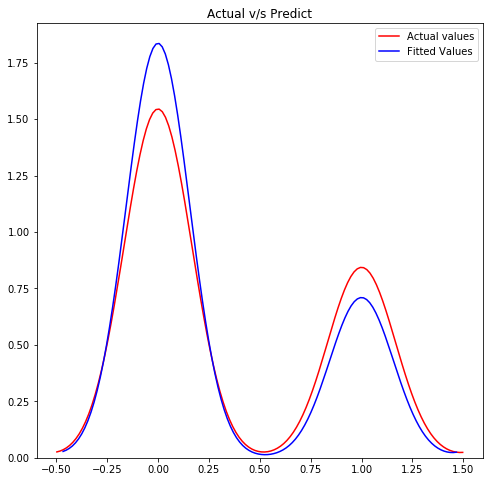

In [34]:
#checking model wheather it is overfitted or underfitted
plt.figure(figsize=(8,8))
plt.title('Actual v/s Predict')
ax1=sns.distplot(y_test,hist=False,color='r',label='Actual values')
sns.distplot(pred,hist=False,color='b',label='Fitted Values',ax=ax1)

In [36]:
#clf overfitting is slightly reduce at 0 

In [35]:
#cross validation score
score=cross_val_score(model,X_train,y_train,cv=4)
print('Score=',score)
print('Score mean=',score.mean())

#cross validation prediction
predict=cross_val_predict(model,X_train,y_train,cv=4)
print('Predicts=',predict[0:5])

#mean squared error
mse=mean_squared_error(y_test,pred)
print('Mean Squared Error=',mse)

#accuracy score
print('Accuracy Score=',accuracy_score(y_test,pred))

#classification report
print('\nClassification Report:\n',classification_report(y_test,pred))

C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\Asad\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Score= [0.73015873 0.728      0.67741935 0.75      ]
Score mean= 0.7213945212493599
Predicts= [0 1 1 0 0]
Mean Squared Error= 0.23048327137546468
Accuracy Score= 0.7695167286245354

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       174
           1       0.72      0.57      0.64        95

    accuracy                           0.77       269
   macro avg       0.75      0.72      0.73       269
weighted avg       0.76      0.77      0.76       269

